In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt", delimiter=':::',header=None,engine = 'python')
test_data = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt", delimiter=':::',header=None,engine = 'python')
test_data_soln = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt", delimiter=':::',header=None,engine = 'python')

In [3]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_data.columns = ["id", "Title", "Genre", "Description"]
test_data.columns = ["id", "Title", "Description"]
test_data_soln.columns = ["id", "Title", "Genre", "Description"]

In [5]:
train_data.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
train_data.isnull().sum()

id             0
Title          0
Genre          0
Description    0
dtype: int64

In [7]:
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

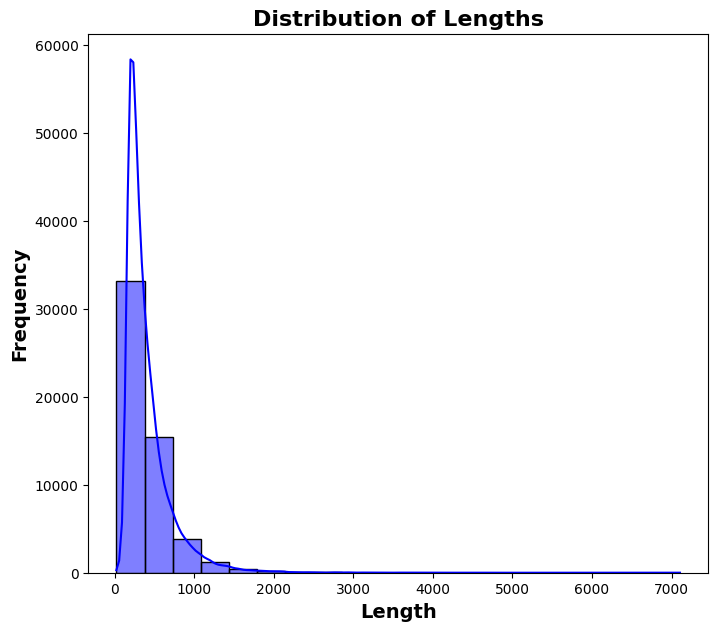

In [9]:
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [10]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])


# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [11]:
X = X_train
y = train_data['Genre']
X_train_n, X_val, y_train_n, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
clf = SVC()

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_n)
y_val_encoded = label_encoder.transform(y_val)

In [13]:
clf.fit(X_train_n, y_train_encoded)
y_pred = clf.predict(X_val)
# Evaluate the performance of the model
accuracy = accuracy_score(y_val_encoded, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val_encoded, y_pred))

Validation Accuracy: 0.5691229364567002
              precision    recall  f1-score   support

           0       0.64      0.13      0.22       263
           1       0.84      0.14      0.24       112
           2       0.52      0.09      0.15       139
           3       1.00      0.01      0.02       104
           4       0.00      0.00      0.00        61
           5       0.53      0.54      0.54      1443
           6       0.00      0.00      0.00       107
           7       0.64      0.88      0.74      2659
           8       0.50      0.84      0.62      2697
           9       0.73      0.05      0.10       150
          10       0.00      0.00      0.00        74
          11       1.00      0.33      0.49        40
          12       0.00      0.00      0.00        45
          13       0.72      0.52      0.60       431
          14       0.77      0.25      0.38       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
X_test_predictions = clf.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions
test_data_soln['Genre'] = label_encoder.fit_transform(test_data_soln['Genre'])

In [16]:
ctest_data = test_data['Predicted_Genre']
ctest_data_soln = test_data_soln['Genre']

matches = ctest_data == ctest_data_soln
num_matches = matches.sum()

In [17]:
#percentage of datapoints matching
num_matches/len(test_data)

0.5711254612546125

In [ ]:
#accuracies percentage
#multi naive bayes - 41
#random forest - 48
#svc - 57.1125
#XgB - 54.38